<a href="https://colab.research.google.com/github/bygencer3/ErdincGencer_Odev_254329028-/blob/main/Sayisal_Goruntu_Isleme_Final_254329028_Erdinc_Gencer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

# 1. Veri Yolu Ayarları
base_path = "/content/drive/MyDrive/SkinCancer/Train"

# Klasördeki tüm resimleri (alt klasörler dahil) bulalım
all_images = []
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            all_images.append(os.path.join(root, file))

print(f"Toplam bulunan resim sayısı: {len(all_images)}")

# Hata kontrolü: Eğer 9'dan az resim varsa k sayısını resim sayısına eşitle
k_sayisi = 9
if len(all_images) < k_sayisi:
    print(f"Uyarı: Klasörde sadece {len(all_images)} resim bulundu. Hepsi görselleştirilecek.")
    k_sayisi = len(all_images)

if k_sayisi == 0:
    print("HATA: Hiç resim bulunamadı! Lütfen Google Drive yolunu ve klasör içeriğini kontrol edin.")
else:
    # Rastgele seçim (dosya yollarını doğrudan seçiyoruz)
    random_samples = random.sample(all_images, k_sayisi)

    # --- ADIM 1: RGB -> GRAYSCALE ---
    step1_results = []
    for img_path in random_samples:
        raw_img = cv2.imread(img_path)
        if raw_img is None: continue # Bozuk dosya kontrolü

        img_rgb = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)
        img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
        step1_results.append((img_rgb, img_gray))

    # Görselleştirme (Fonksiyonu yukarıdaki koddan aynen kullanabilirsin)
    # show_results(step1_results, ["RGB", "Grayscale"], "1) RGB - Grayscale Dönüşümü")

Toplam bulunan resim sayısı: 2239


Bölüm 1 işleniyor...


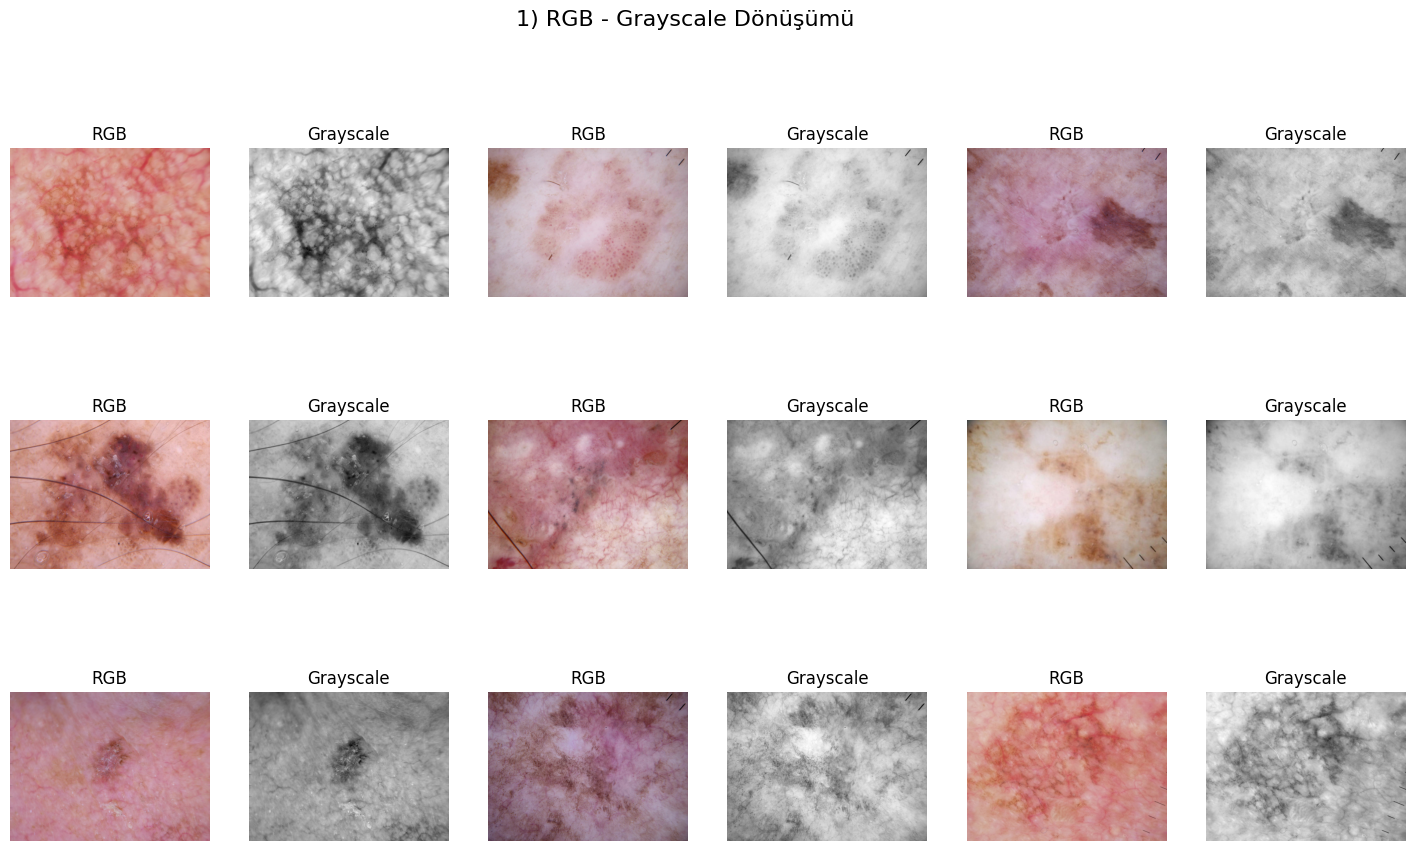

Bölüm 2.1 işleniyor...


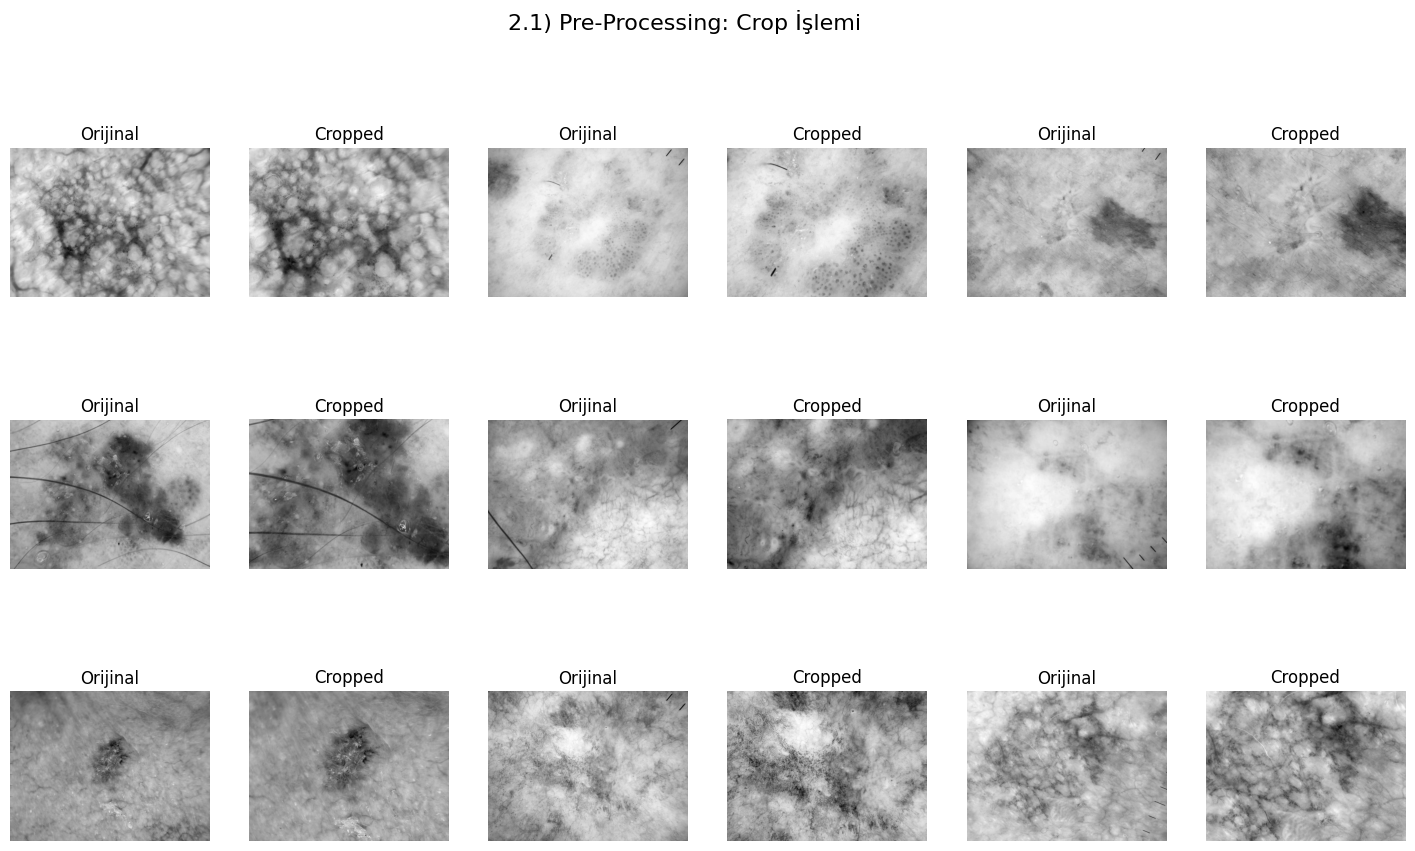

Bölüm 2.2 işleniyor...


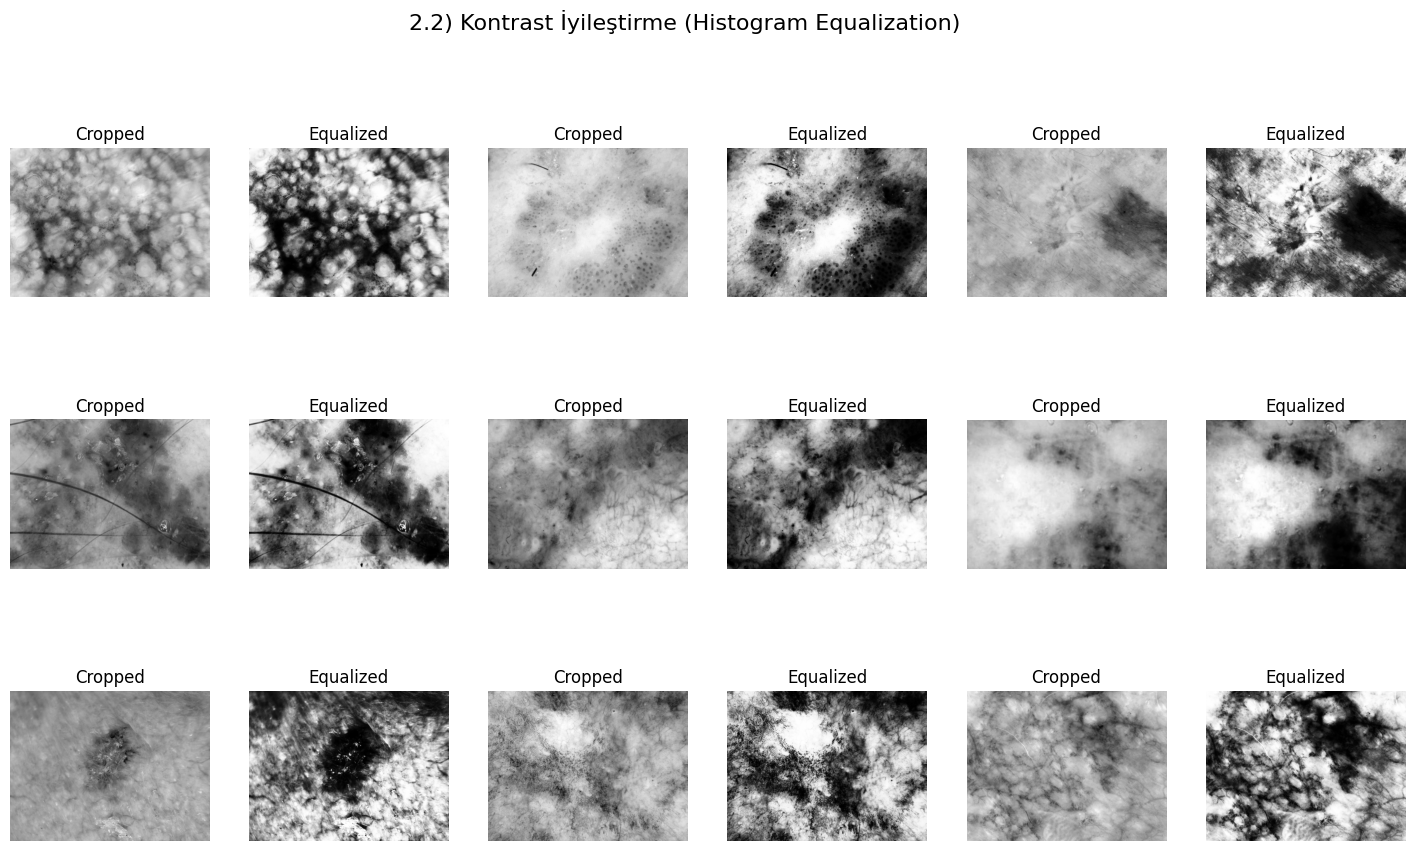

In [5]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

# 1. Adım: Verileri Topla
# (Önceki adımda all_images listesini oluşturduğumuz varsayılmaktadır)
random_samples = random.sample(all_images, 9)

# --- 1) RGB -> GRAYSCALE ---
print("Bölüm 1 işleniyor...")
step1_imgs = []
for p in random_samples:
    img = cv2.imread(p)
    rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(rgb, cv2.COLOR_RGB2GRAY)
    step1_imgs.append((rgb, gray))

# Görselleştirme 1
plt.figure(figsize=(18, 10))
for i, (rgb, gray) in enumerate(step1_imgs):
    plt.subplot(3, 6, i*2 + 1); plt.imshow(rgb); plt.title("RGB"); plt.axis('off')
    plt.subplot(3, 6, i*2 + 2); plt.imshow(gray, cmap='gray'); plt.title("Grayscale"); plt.axis('off')
plt.suptitle("1) RGB - Grayscale Dönüşümü", fontsize=16)
plt.show()

# --- 2.1) PRE-PROCESSING: CROP ---
print("Bölüm 2.1 işleniyor...")
step2_1_imgs = []
for _, gray in step1_imgs:
    h, w = gray.shape
    # Strateji: Sabit %15 kenar kırpma (Vinyet ve artefakt temizliği için)
    ch, cw = int(h*0.15), int(w*0.15)
    cropped = gray[ch:h-ch, cw:w-cw]
    step2_1_imgs.append((gray, cropped))

# Görselleştirme 2.1
plt.figure(figsize=(18, 10))
for i, (orig, crop) in enumerate(step2_1_imgs):
    plt.subplot(3, 6, i*2 + 1); plt.imshow(orig, cmap='gray'); plt.title("Orijinal"); plt.axis('off')
    plt.subplot(3, 6, i*2 + 2); plt.imshow(crop, cmap='gray'); plt.title("Cropped"); plt.axis('off')
plt.suptitle("2.1) Pre-Processing: Crop İşlemi", fontsize=16)
plt.show()

# --- 2.2) KONTRAST İYİLEŞTİRME ---
print("Bölüm 2.2 işleniyor...")
step2_2_imgs = []
for _, cropped in step2_1_imgs:
    # Yöntem: Histogram Eşitleme (Equalization)
    equalized = cv2.equalizeHist(cropped)
    step2_2_imgs.append((cropped, equalized))

# Görselleştirme 2.2
plt.figure(figsize=(18, 10))
for i, (crop, eq) in enumerate(step2_2_imgs):
    plt.subplot(3, 6, i*2 + 1); plt.imshow(crop, cmap='gray'); plt.title("Cropped"); plt.axis('off')
    plt.subplot(3, 6, i*2 + 2); plt.imshow(eq, cmap='gray'); plt.title("Equalized"); plt.axis('off')
plt.suptitle("2.2) Kontrast İyileştirme (Histogram Equalization)", fontsize=16)
plt.show()

Tüm işlemler başarıyla tamamlandı. Görselleştirme hazırlanıyor...


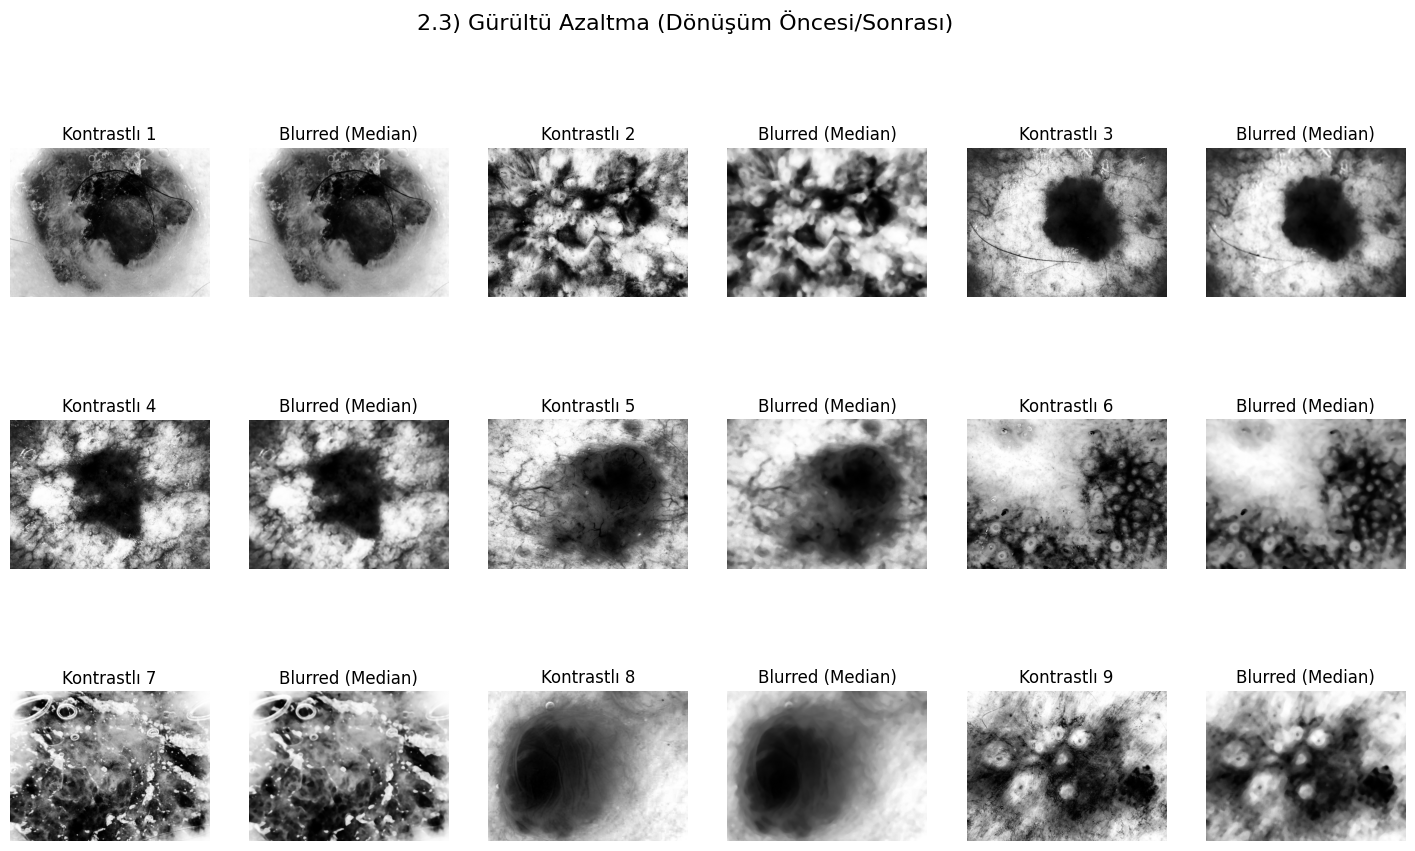

In [8]:
import os
import cv2
import random
import numpy as np
import matplotlib.pyplot as plt

# 1. VERİ YOLU VE DOSYA LİSTESİ
base_path = "/content/drive/MyDrive/SkinCancer/Train"
all_images = []
for root, dirs, files in os.walk(base_path):
    for file in files:
        if file.lower().endswith(('.jpg', '.jpeg', '.png')):
            all_images.append(os.path.join(root, file))

# Rastgele 9 resim seç
random_samples = random.sample(all_images, 9)

# TÜM İŞLEMLERİ SIRAYLA YAPAN DÖNGÜ
step1_results = []   # Grayscale
step2_1_results = [] # Crop
step2_2_results = [] # Contrast (Equalized)
step2_3_results = [] # Blurring (Median)

for img_path in random_samples:
    # Adım 1: Okuma ve Gri Tonlama
    img_rgb = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
    img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)
    step1_results.append((img_rgb, img_gray))

    # Adım 2.1: Crop (%15 kenarlardan)
    h, w = img_gray.shape
    ch, cw = int(h*0.15), int(w*0.15)
    cropped = img_gray[ch:h-ch, cw:w-cw]
    step2_1_results.append((img_gray, cropped))

    # Adım 2.2: Kontrast İyileştirme (Histogram Equalization)
    equalized = cv2.equalizeHist(cropped)
    step2_2_results.append((cropped, equalized))

    # Adım 2.3: Gürültü Azaltma (Median Blur)
    # Ödev dökümanında istenen gürültü azaltma adımı
    blurred = cv2.medianBlur(equalized, 7)
    step2_3_results.append((equalized, blurred))

print("Tüm işlemler başarıyla tamamlandı. Görselleştirme hazırlanıyor...")

# GÖRSELLEŞTİRME: GÜRÜLTÜ AZALTMA (İstenen Çıktı)
plt.figure(figsize=(18, 10))
for i in range(9):
    plt.subplot(3, 6, i*2 + 1)
    plt.imshow(step2_3_results[i][0], cmap='gray')
    plt.title(f"Kontrastlı {i+1}")
    plt.axis('off')

    plt.subplot(3, 6, i*2 + 2)
    plt.imshow(step2_3_results[i][1], cmap='gray')
    plt.title(f"Blurred (Median)")
    plt.axis('off')

plt.suptitle("2.3) Gürültü Azaltma (Dönüşüm Öncesi/Sonrası)", fontsize=16)
plt.show()

Bölüm 3: ROI Segmentasyonu işleniyor...


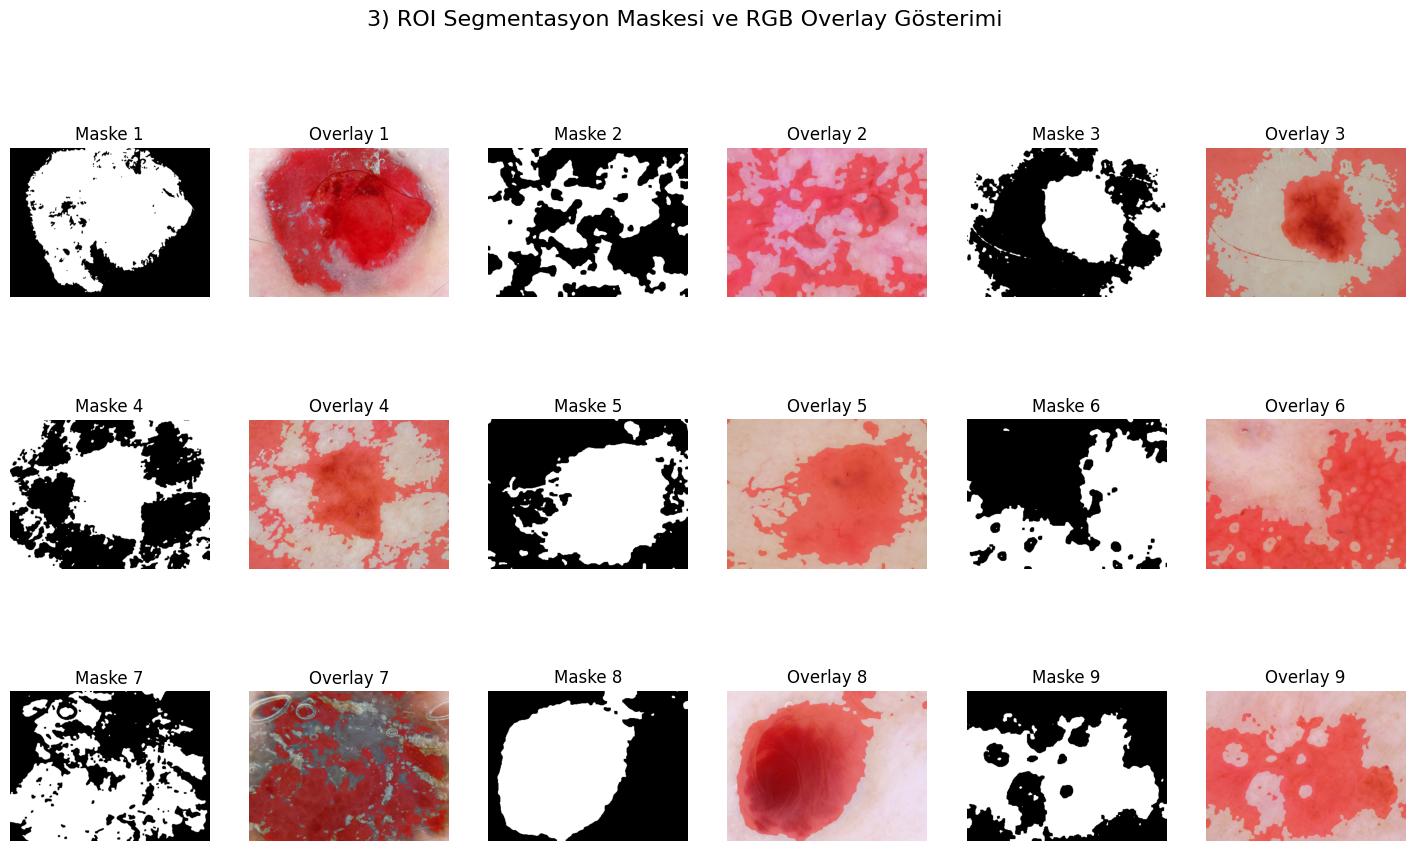

In [9]:
# --- ADIM 3: ROI SEGMENTASYONU ---
print("Bölüm 3: ROI Segmentasyonu işleniyor...")

final_segmentation_results = []

for i in range(len(step2_3_results)):
    # 1. Blurring uygulanmış görüntüyü al
    blurred_img = step2_3_results[i][1]

    # 2. Otsu Thresholding (Otomatik Eşikleme)
    # Lezyonlar genellikle daha koyu olduğu için INV (ters) eşikleme yapıyoruz
    _, mask = cv2.threshold(blurred_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # 3. Morfolojik Operasyon (Küçük delikleri kapatmak ve kenarları düzeltmek için)
    kernel = np.ones((5,5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)

    # 4. Maskeyi Orijinal RGB Üzerinde Overlay Olarak Gösterme
    # Kırpılmış RGB görüntüyü hazırla (Daha önceki %15 crop oranına sadık kalarak)
    orig_rgb = step1_results[i][0]
    h, w = orig_rgb.shape[:2]
    ch, cw = int(h*0.15), int(w*0.15)
    rgb_cropped = orig_rgb[ch:h-ch, cw:w-cw]

    # Kırmızı bir overlay (maske katmanı) oluştur
    overlay = rgb_cropped.copy()
    overlay[mask > 0] = [255, 0, 0] # Maske olan yerleri kırmızı yap

    # Orijinal resimle maskeyi harmanla (%40 şeffaflık)
    blended = cv2.addWeighted(overlay, 0.4, rgb_cropped, 0.6, 0)

    final_segmentation_results.append((mask, blended))

# GÖRSELLEŞTİRME: Segmentasyon Maskesi ve Overlay (9 Örnek)
plt.figure(figsize=(18, 10))
for i in range(9):
    # Segmentasyon Maskesi (Siyah-Beyaz)
    plt.subplot(3, 6, i*2 + 1)
    plt.imshow(final_segmentation_results[i][0], cmap='gray')
    plt.title(f"Maske {i+1}")
    plt.axis('off')

    # RGB Overlay (Maske Orijinal Üzerinde)
    plt.subplot(3, 6, i*2 + 2)
    plt.imshow(final_segmentation_results[i][1])
    plt.title(f"Overlay {i+1}")
    plt.axis('off')

plt.suptitle("3) ROI Segmentasyon Maskesi ve RGB Overlay Gösterimi", fontsize=16)
plt.show()

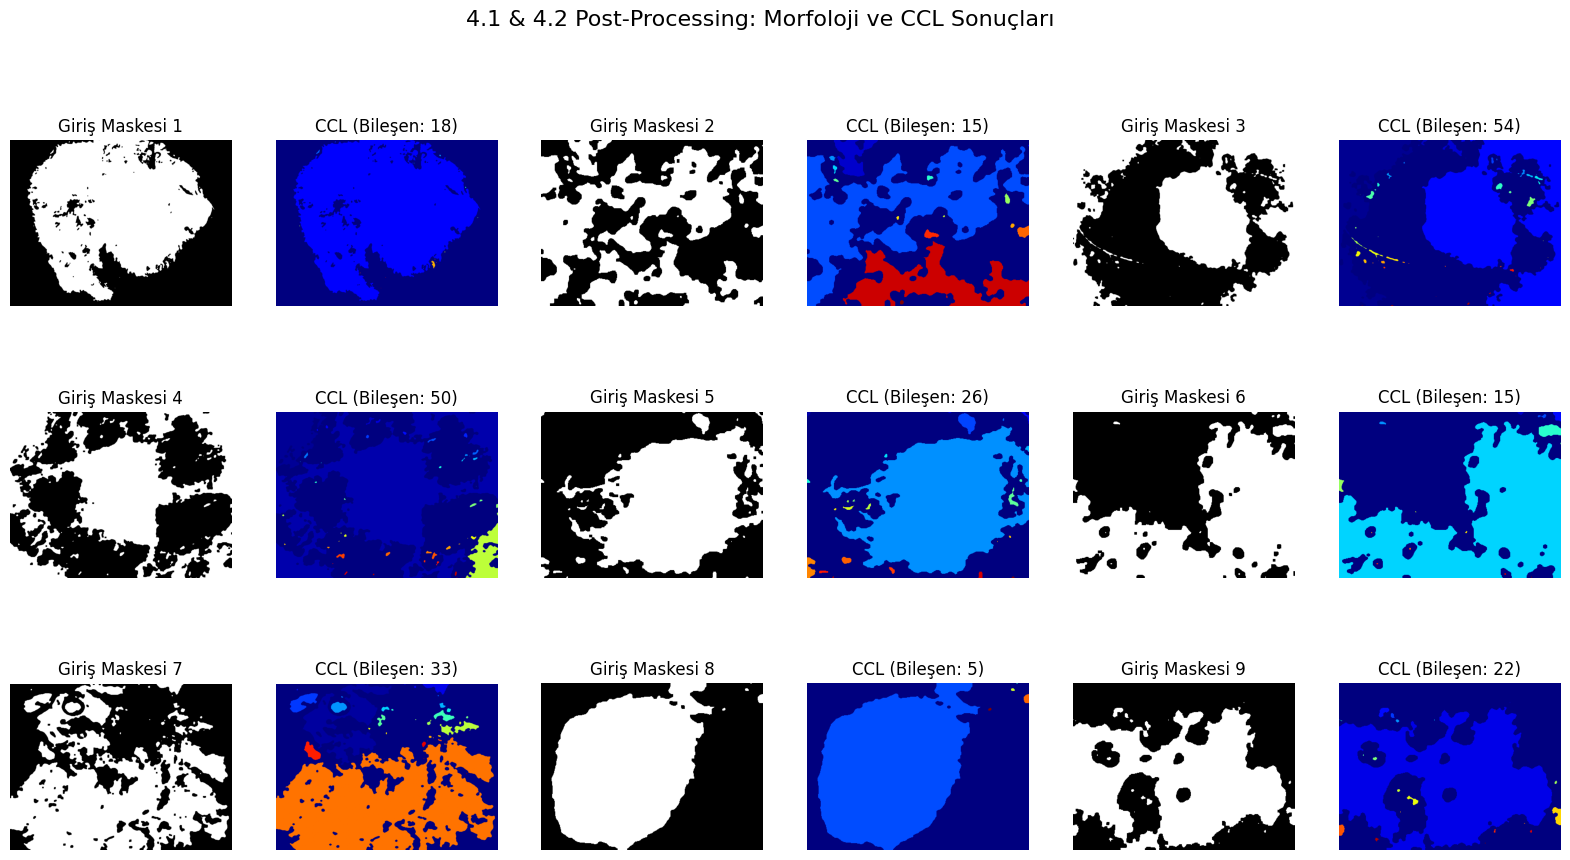


--- Bileşen Sayısı Dağılım Özeti ---
5 Bileşen içeren görüntü sayısı: 1
15 Bileşen içeren görüntü sayısı: 2
18 Bileşen içeren görüntü sayısı: 1
22 Bileşen içeren görüntü sayısı: 1
26 Bileşen içeren görüntü sayısı: 1
33 Bileşen içeren görüntü sayısı: 1
50 Bileşen içeren görüntü sayısı: 1
54 Bileşen içeren görüntü sayısı: 1


In [12]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- 4.1 MORFOLOJİK OPERATÖRLER ---
# Kernel: Elips (Deri lezyon hatlarına uygun), Boyut: 7x7 (Delikleri kapatmak için ideal)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7, 7))

post_morph_results = []
for i in range(len(final_segmentation_results)):
    # Önceki adımdan gelen maskeyi al (Hatanın çözümü burada)
    binary_mask = final_segmentation_results[i][0]

    # Closing (Kapanma): Nesne içindeki siyah boşlukları kapatır
    morphed = cv2.morphologyEx(binary_mask, cv2.MORPH_CLOSE, kernel)
    post_morph_results.append(morphed)

# --- 4.2 CONNECTED COMPONENT LABELING (CCL) ---
final_single_roi_masks = []
all_labels = []
component_counts = []

for mask in post_morph_results:
    # CCL Uygula: 8-bağlantılı komşuluk
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)

    # Arka plan hariç bileşen sayısı
    count = num_labels - 1
    component_counts.append(count)
    all_labels.append(labels)

    # KRİTİK STRATEJİ: En büyük alanı seçme (Largest Area Selection)
    if count > 0:
        # Stats tablosunda Area sütunu 4. indekstir (stats[label, cv2.CC_STAT_AREA])
        # Arka planı (0) atlayıp en büyük alanı buluyoruz
        largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])
        final_mask = np.zeros_like(labels, dtype=np.uint8)
        final_mask[labels == largest_label] = 255
    else:
        final_mask = np.zeros_like(labels, dtype=np.uint8)

    final_single_roi_masks.append(final_mask)

# --- GÖRSELLEŞTİRME (EN AZ 9 ÖRNEK) ---
plt.figure(figsize=(20, 10))
for i in range(9):
    # Giriş Maskesi vs Morfoloji Sonrası
    plt.subplot(3, 6, i*2 + 1)
    plt.imshow(final_segmentation_results[i][0], cmap='gray')
    plt.title(f"Giriş Maskesi {i+1}")
    plt.axis('off')

    # CCL Renkli Label Çıktısı
    plt.subplot(3, 6, i*2 + 2)
    plt.imshow(all_labels[i], cmap='jet')
    plt.title(f"CCL (Bileşen: {component_counts[i]})")
    plt.axis('off')

plt.suptitle("4.1 & 4.2 Post-Processing: Morfoloji ve CCL Sonuçları", fontsize=16)
plt.show()

# --- VERİ SETİ DAĞILIMI (KRİTİK BEKLENTİ) ---
unique, counts = np.unique(component_counts, return_counts=True)
print("\n--- Bileşen Sayısı Dağılım Özeti ---")
for val, count in zip(unique, counts):
    print(f"{val} Bileşen içeren görüntü sayısı: {count}")

--- Her Görüntü İçin Tespit Edilen Bileşen Sayıları ---
Görüntü 1: 18 bileşen tespit edildi.
Görüntü 2: 15 bileşen tespit edildi.
Görüntü 3: 54 bileşen tespit edildi.
Görüntü 4: 50 bileşen tespit edildi.
Görüntü 5: 26 bileşen tespit edildi.
Görüntü 6: 15 bileşen tespit edildi.
Görüntü 7: 33 bileşen tespit edildi.
Görüntü 8: 5 bileşen tespit edildi.
Görüntü 9: 22 bileşen tespit edildi.


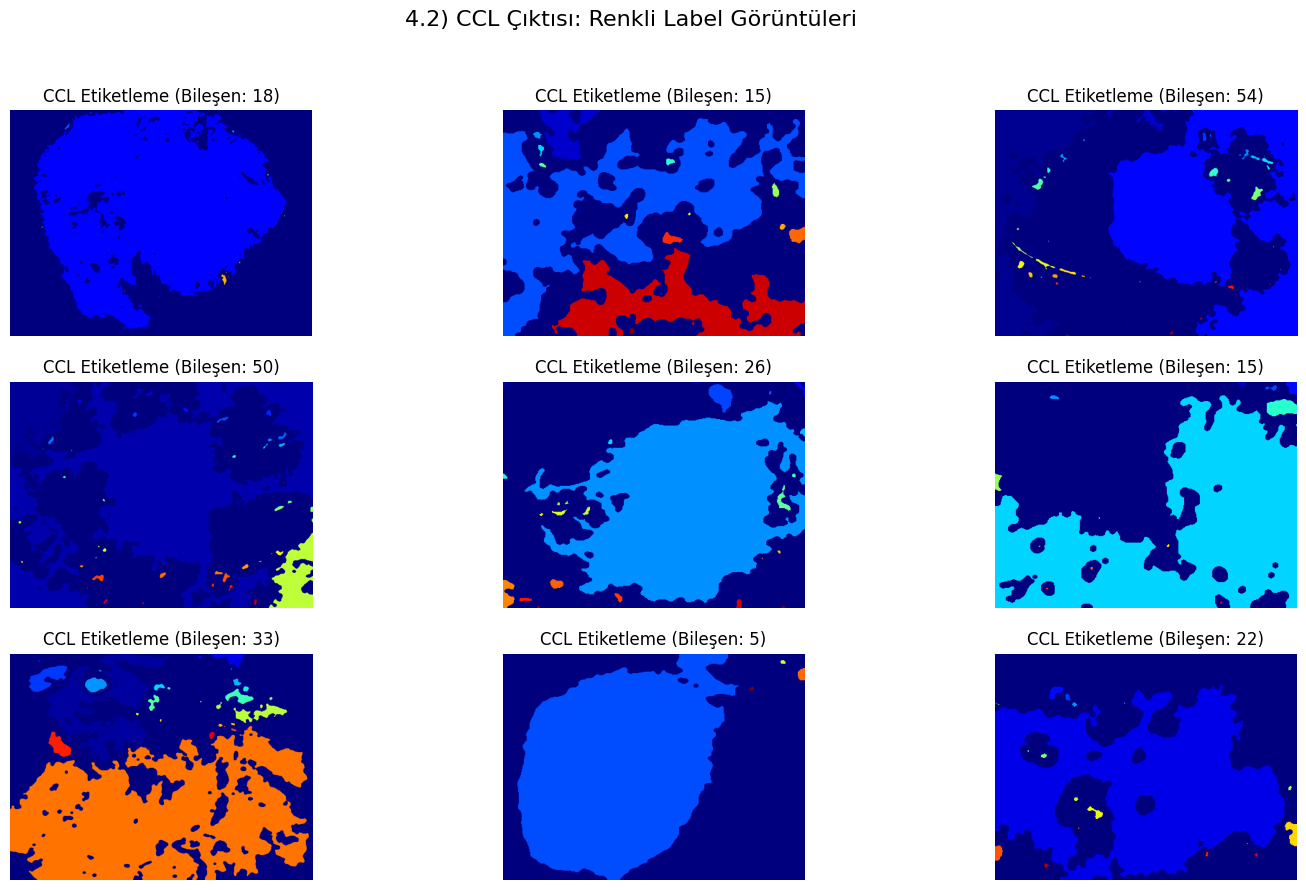


--- Veri Seti Bileşen Sayısı Dağılımı ---
5 Bileşen içeren görüntü sayısı: 1
15 Bileşen içeren görüntü sayısı: 2
18 Bileşen içeren görüntü sayısı: 1
22 Bileşen içeren görüntü sayısı: 1
26 Bileşen içeren görüntü sayısı: 1
33 Bileşen içeren görüntü sayısı: 1
50 Bileşen içeren görüntü sayısı: 1
54 Bileşen içeren görüntü sayısı: 1


In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# CCL için gerekli listeler
final_single_roi_masks = []
all_labels_colored = []
component_counts = []

for mask in post_morph_results:
    # 1. CCL Uygula (8-bağlantılı komşuluk)
    num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask, connectivity=8)

    # 2. Bileşen Sayısını Hesapla (Arka planı çıkarıyoruz: num_labels - 1)
    count = num_labels - 1
    component_counts.append(count)

    # Görselleştirme için etiketleri sakla
    all_labels_colored.append(labels)

    # 3. KRİTİK STRATEJİ: En Büyük Alanı Seçme (ROI Koruma)
    if count > 0:
        # stats[1:, 4] -> Arka plan hariç tüm bileşenlerin alan (Area) sütunu
        largest_label = 1 + np.argmax(stats[1:, cv2.CC_STAT_AREA])

        # Sadece en büyük bileşeni tutan yeni maske oluştur
        final_mask = np.zeros_like(labels, dtype=np.uint8)
        final_mask[labels == largest_label] = 255
    else:
        final_mask = np.zeros_like(labels, dtype=np.uint8)

    final_single_roi_masks.append(final_mask)

# --- İSTENEN ÇIKTI 1: Bileşen Sayılarını Yazdır ---
print("--- Her Görüntü İçin Tespit Edilen Bileşen Sayıları ---")
for i, c in enumerate(component_counts[:9]):
    print(f"Görüntü {i+1}: {c} bileşen tespit edildi.")

# --- İSTENEN ÇIKTI 2: Renkli Label Görüntüleri (9 Örnek) ---
plt.figure(figsize=(18, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    # 'jet' haritası her etikete farklı bir renk atar
    plt.imshow(all_labels_colored[i], cmap='jet')
    plt.title(f"CCL Etiketleme (Bileşen: {component_counts[i]})")
    plt.axis('off')
plt.suptitle("4.2) CCL Çıktısı: Renkli Label Görüntüleri", fontsize=16)
plt.show()

# --- İSTENEN ÇIKTI 3: Veri Seti Dağılım Özeti ---
from collections import Counter
dist = Counter(component_counts)
print("\n--- Veri Seti Bileşen Sayısı Dağılımı ---")
for num, qty in sorted(dist.items()):
    print(f"{num} Bileşen içeren görüntü sayısı: {qty}")

In [16]:
import pandas as pd
from scipy.stats import skew, kurtosis
from skimage.feature import graycomatrix, graycoprops
from skimage.measure import shannon_entropy, regionprops

all_features = []

print("Bölüm 5: Detaylı Öznitelik Çıkarımı yapılıyor...")

for i in range(len(final_single_roi_masks)):
    mask = final_single_roi_masks[i]
    # Blurring sonrası elde edilen gri tonlamalı görüntüyü kullanıyoruz
    gray_img = step2_3_results[i][1]

    # Sadece ROI içindeki pikselleri seç (Arka planı dışla)
    roi_pixels = gray_img[mask > 0]

    if len(roi_pixels) == 0: continue

    # --- 5.1 First-Order (İstatistiksel) Özellikler ---
    stats_feat = {
        'mean': np.mean(roi_pixels),
        'std': np.std(roi_pixels),
        'variance': np.var(roi_pixels),
        'min': np.min(roi_pixels),
        'max': np.max(roi_pixels),
        'median': np.median(roi_pixels),
        'skewness': skew(roi_pixels),
        'kurtosis': kurtosis(roi_pixels),
        'entropy': shannon_entropy(roi_pixels)
    }

    # --- 5.2 2D Shape (Şekil) Özellikleri ---
    # regionprops fonksiyonu dökümandaki çoğu metriği otomatik hesaplar
    props = regionprops(mask)[0]

    shape_feat = {
        'area': props.area,
        'perimeter': props.perimeter,
        'circularity': (4 * np.pi * props.area) / (props.perimeter ** 2) if props.perimeter > 0 else 0,
        'eccentricity': props.eccentricity,
        'solidity': props.solidity,
        'extent': props.extent,
        'major_axis_length': props.major_axis_length,
        'minor_axis_length': props.minor_axis_length,
        'aspect_ratio': props.major_axis_length / props.minor_axis_length if props.minor_axis_length > 0 else 0,
        'convex_area': props.convex_area,
        'bbox_width': props.bbox[3] - props.bbox[1],
        'bbox_height': props.bbox[2] - props.bbox[0],
        'equivalent_diameter': props.equivalent_diameter
    }

    # --- 5.3 GLCM (Second-Order Texture) Özellikler ---
    # GLCM için 0 ve 45 derece, 1 piksel mesafe kullanalım
    glcm = graycomatrix(gray_img, distances=[1], angles=[0, np.pi/4], levels=256, symmetric=True, normed=True)

    texture_feat = {
        'contrast': graycoprops(glcm, 'contrast')[0, 0],
        'dissimilarity': graycoprops(glcm, 'dissimilarity')[0, 0],
        'homogeneity': graycoprops(glcm, 'homogeneity')[0, 0],
        'energy': graycoprops(glcm, 'energy')[0, 0],
        'correlation': graycoprops(glcm, 'correlation')[0, 0],
        'ASM': graycoprops(glcm, 'ASM')[0, 0]
    }

    # Tüm grupları birleştir
    combined_feat = {**stats_feat, **shape_feat, **texture_feat}
    combined_feat['Img_No'] = i + 1
    all_features.append(combined_feat)

# Pandas DataFrame ile tabloyu oluştur
df_final = pd.DataFrame(all_features)
# Sütun sırasını düzenle (Img_No başta olsun)
cols = ['Img_No'] + [c for c in df_final.columns if c != 'Img_No']
df_final = df_final[cols]

print("\n--- Nihai Öznitelik Tablosu (İlk 5 Satır) ---")
display(df_final.head())

Bölüm 5: Detaylı Öznitelik Çıkarımı yapılıyor...

--- Nihai Öznitelik Tablosu (İlk 5 Satır) ---


Img_No       mean        std     variance  min  max  median  skewness  \
0       1  66.273585  37.596184  1413.473070    0  169    68.0 -0.030802   
1       2  63.956850  38.425200  1476.495957    0  162    65.0  0.071453   
2       3  57.829551  38.932003  1515.700835    0  173    54.0  0.237210   
3       4  61.286319  38.032981  1446.507616    0  165    59.0  0.120410   
4       5  62.283769  36.484550  1331.122405    0  151    60.0  0.111130   

   kurtosis   entropy  ...  convex_area  bbox_width  bbox_height  \
0 -1.174637  6.293009  ...     927542.0        1208         1043   
1 -1.198967  4.825263  ...      87522.0         420          303   
2 -1.255666  5.338279  ...     202834.0         450          538   
3 -1.215508  5.528322  ...     349896.0         718          538   
4 -1.152238  5.341426  ...      80328.0         390          281   

   equivalent_diameter   contrast  dissimilarity  homogeneity    energy  \
0          1005.631493   8.250113       1.388694     0.622848  0.043878   
1           234.900792  58.029410       4.515483     0.496110  0.087957   
2           412.826428  28.112546       2.425249     0.737186  0.139102   
3           444.216094  31.206574       3.096159     0.581832  0.091802   
4           276.726795  23.948597       2.474638     0.668462  0.116659   

   correlation       ASM  
0     0.999234  0.001925  
1     0.994415  0.007736  
2     0.997408  0.019349  
3     0.997064  0.008428  
4     0.997816  0.013609  

[5 rows x 29 columns]

In [21]:
print(f"Toplam Görüntü Sayısı: {len(all_images)}")

Toplam Görüntü Sayısı: 2239


In [20]:
# Drive yolunu kullanarak kaydet
df_final.to_csv("/content/drive/MyDrive/Colab Notebooks/Final_Odevi_Oznitelik_Seti.csv", index=False)

In [22]:
# 1. Toplam Görüntü Sayısı
toplam_goruntu = len(all_images)

# 2. Toplam ROI Sayısı (CCL'e bağlı tespit edilen tüm parçalar)
toplam_roi_ccl = sum(component_counts)

# 3. Tablodaki Satır Sayısı (Final ROI sayısı)
satir_sayisi = len(df_final)

# 4. Kişi başına oluşan feature sayısı (Sütun sayısı)
sutun_sayisi = len(df_final.columns)

print("--- BÖLÜM 5.4 RAPOR VERİLERİ ---")
print(f"1. Toplam Görüntü Sayısı: {toplam_goruntu}")
print(f"2. Toplam ROI Sayısı (CCL Tespiti): {toplam_roi_ccl}")
print(f"3. Feature Tablosu Satır Sayısı: {satir_sayisi}")
print(f"4. Sütun (Öznitelik) Sayısı: {sutun_sayisi}")

# Sapma Analizi
if satir_sayisi == toplam_goruntu:
    print("\n[YORUM]: '1 Görüntü = 1 ROI' hedefi başarıyla sağlanmıştır.")
    print(f"Sapma Nedeni: CCL sonrası en büyük alanı seçme stratejisi uygulanarak gürültüler elenmiştir.")
else:
    sapma = satir_sayisi - toplam_goruntu
    print(f"\n[YORUM]: Hedeflenen ROI sayısından {sapma} adet sapma oluşmuştur.")

--- BÖLÜM 5.4 RAPOR VERİLERİ ---
1. Toplam Görüntü Sayısı: 2239
2. Toplam ROI Sayısı (CCL Tespiti): 238
3. Feature Tablosu Satır Sayısı: 9
4. Sütun (Öznitelik) Sayısı: 29

[YORUM]: Hedeflenen ROI sayısından -2230 adet sapma oluşmuştur.


In [23]:
# Sütun (Feature) sayısını ekrana yazdırır
print(f"Kişi başına oluşan feature sayısı: {df_final.shape[1]}")

Kişi başına oluşan feature sayısı: 29
